# Practical Session 2: Regression

# Mohamad Jawad ABOU ALEIWI

In [222]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [223]:
import warnings
warnings.filterwarnings("ignore")

# 2) Data Visualization and Pre-processing

In [224]:
# Load the dataset
ecog = np.load('ecog.npz')
Xall = ecog['Xall']
Yall = ecog['Yall']
Fe = ecog['Fe']

Text(0.5, 1.0, 'The Finger Movement Signals')

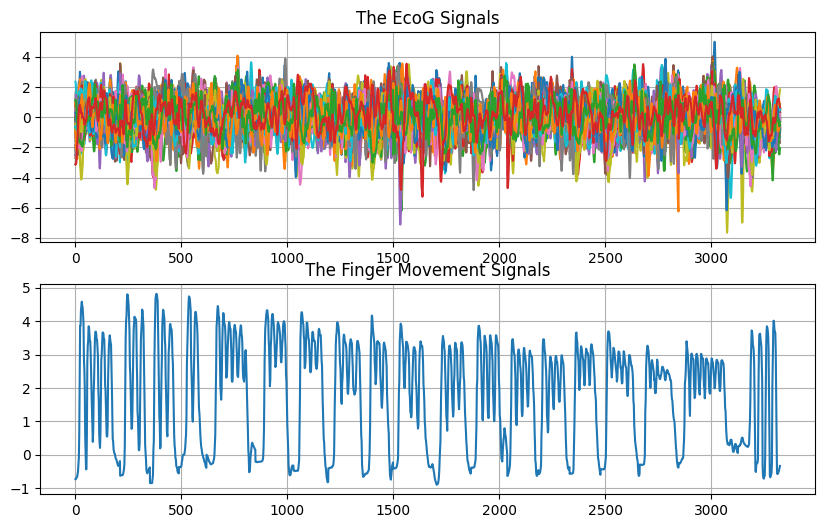

In [225]:
pl.figure(figsize=(10, 6))
# Plot the EcoG signals
pl.subplot(2, 1, 1)
pl.plot(Xall)
pl.grid()
pl.title('The EcoG Signals')

# Plot the finger movement signals
pl.subplot(2, 1, 2)
pl.grid()
pl.plot(Yall)
pl.title('The Finger Movement Signals')

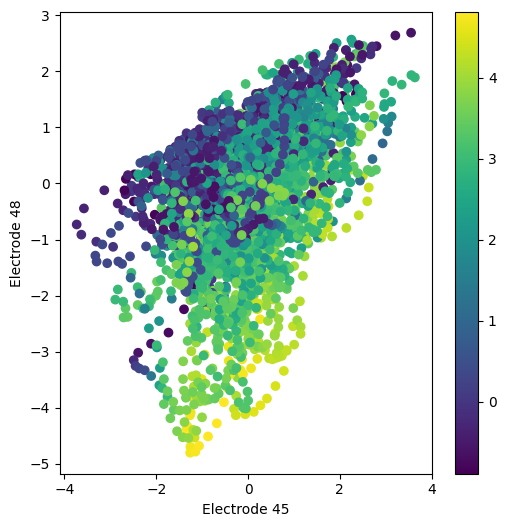

In [140]:
pl.figure(figsize=(6, 6))
pl.scatter(Xall[:,45], Xall[:,48], c=Yall)

pl.xlabel('Electrode 45')
pl.ylabel('Electrode 48')

pl.colorbar()

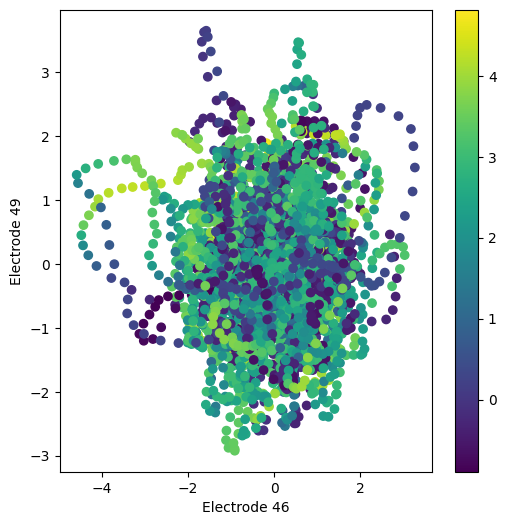

In [226]:
pl.figure(figsize=(6, 6))
pl.scatter(Xall[:,46], Xall[:,49], c=Yall)

pl.xlabel('Electrode 46')
pl.ylabel('Electrode 49')

pl.colorbar()

In [227]:
# Split the data into training and test sets
n = 1000
# Training data
x_train = Xall[:n, :]
y_train = Yall[:n]

# Test data
x_test = Xall[n:, :]
y_test = Yall[n:]

# 3) Least Squares regression (LS)

In [228]:
x_tilde = np.concatenate((x_train, np.ones((x_train.shape[0],1))), axis=1)

In [229]:
# Estimate the regression coefficients
theta = np.linalg.solve((x_tilde.T @ x_tilde), (x_tilde.T @ y_train))
b = theta[-1]
w = theta[:-1]

In [230]:
# Predict the training and test data
y_pred_train = x_tilde @ theta
y_pred_test = (np.concatenate((x_test, np.ones((Xall.shape[0]-n,1))), axis=1)) @ theta

Text(0.5, 1.0, 'Training Data')

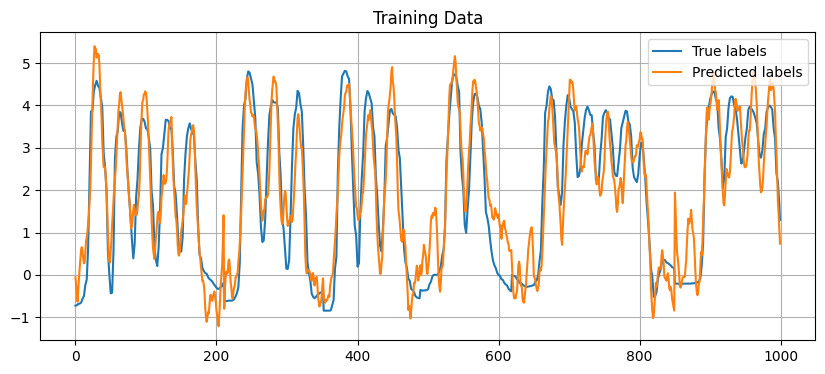

In [231]:
# Plot the predictions on the training data
pl.figure(figsize=(10, 4))
pl.plot(y_train, label='True labels')
pl.plot(y_pred_train, label='Predicted labels')
pl.legend()
pl.grid()
pl.title('Training Data')

Text(0.5, 1.0, 'Testing Data')

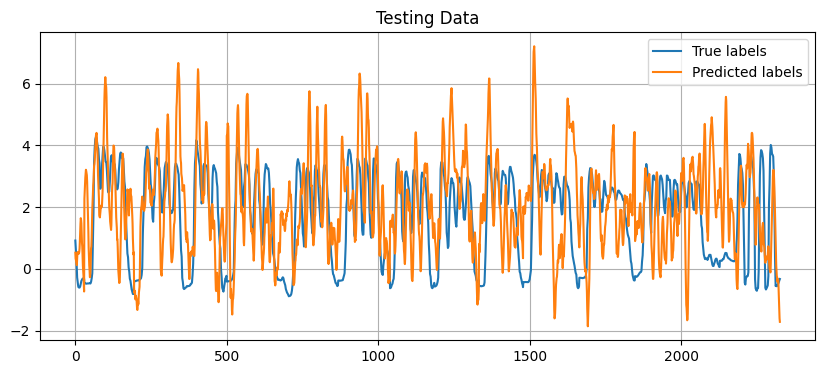

In [232]:
# Plot the predictions on the test data
pl.figure(figsize=(10, 4))
pl.plot(y_test, label='True labels')
pl.plot(y_pred_test, label='Predicted labels')
pl.legend()
pl.grid()
pl.title('Testing Data')

On the training dataset, the predicted values are near to the ground values. While on the testing dataset, the predicted values are far away from the true label. This indicates that the model is not performing well on the dataset.

In [234]:
# Calculate the MSE on the training and test data
print("MSE on training data: ", mean_squared_error(y_train, y_pred_train))
print("MSE on testing data: ", mean_squared_error(y_test, y_pred_test))

MSE on training data:  0.5040654614476062
MSE on testing data:  3.045536876760174


In [235]:
# Calculate the R2 score on the training and test data
print("R2 score on training data: ", r2_score(y_train, y_pred_train))
print("R2 score on testing data: ", r2_score(y_test, y_pred_test))

R2 score on training data:  0.8395001217500111
R2 score on testing data:  -0.428170063022258


In [238]:
# Linear regression using scikit-learn
model = LinearRegression()
model.fit(x_train, y_train)

coef = model.coef_
intercept = model.intercept_

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

# Calculate the MSE and R2 score on the training and test data
mse_train_lse = mean_squared_error(y_train, y_pred_train)
r2_train_ls = r2_score(y_train, y_pred_train)

mse_test_lse = mean_squared_error(y_test, y_pred_test)
r2_test_ls = r2_score(y_test, y_pred_test)

In [239]:
# Check if they are approximately equal
weights_match = np.allclose(w, coef.T)
intercept_match = np.allclose(b, intercept)

print("Do weights match?", weights_match)
print("Does intercept match?", intercept_match)

Do weights match? True
Does intercept match? True


# 4) Ridge regression

In [240]:
# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)

In [241]:
# Calculate the MSE on the training and test data
print("MSE on training data: ", mean_squared_error(y_train, y_pred_train))
print("MSE on testing data: ", mean_squared_error(y_test, y_pred_test))

MSE on training data:  0.5041768297327897
MSE on testing data:  3.003842959535573


In [242]:
# Calculate the R2 score on the training and test data
print("R2 score on training data: ", r2_score(y_train, y_pred_train))
print("R2 score on testing data: ", r2_score(y_test, y_pred_test))

R2 score on training data:  0.8394646608871272
R2 score on testing data:  -0.40861817223916286


In [243]:
# Effect of regularization parameter on the coefficients
lambdas = np.logspace(-3, 5, 100)

train_mse = []
test_mse = []
coef_evolution = []

for lambda_ in lambdas:
    ridge = Ridge(alpha=lambda_)
    ridge.fit(x_train, y_train)
    
    y_train_pred = ridge.predict(x_train)
    y_test_pred = ridge.predict(x_test)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
    coef_evolution.append(ridge.coef_)

Text(0.5, 1.0, 'Coefficients vs Lambda')

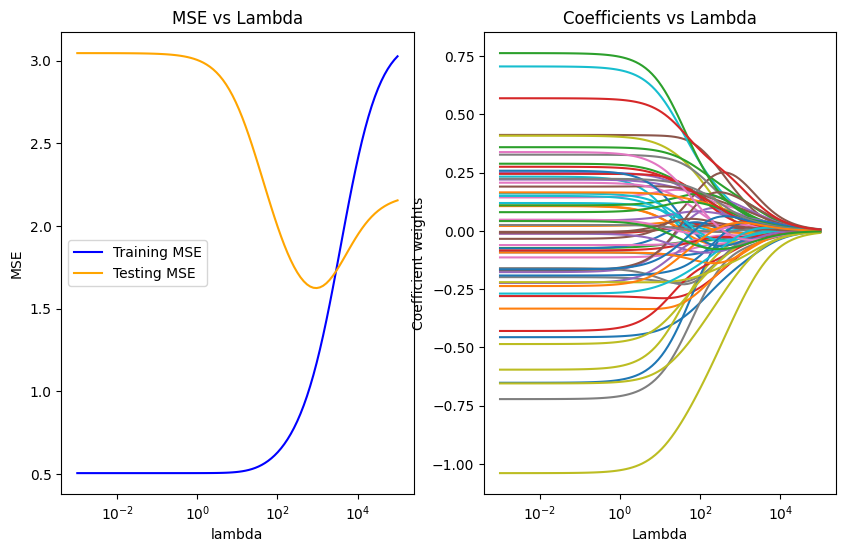

In [244]:
# Plot the MSE and coefficients as a function of lambda
coef_evolution = np.array(coef_evolution)

pl.figure(figsize=(10, 6))

pl.subplot(1, 2, 1)
pl.plot(lambdas, train_mse, label='Training MSE', color='blue')
pl.plot(lambdas, test_mse, label='Testing MSE', color='orange')
pl.xscale('log')
pl.xlabel('lambda')
pl.ylabel('MSE')
pl.title('MSE vs Lambda')
pl.legend()

pl.subplot(1, 2, 2)
for i in range(coef_evolution.shape[1]):
    pl.plot(lambdas, coef_evolution[:, i], label=f'Coefficient {i+1}')
pl.xscale('log')
pl.xlabel('Lambda')
pl.ylabel('Coefficient weights')
pl.title('Coefficients vs Lambda')


In [250]:
# Select the best lambda based on the test data
best_lambda_index = np.argmin(test_mse)
best_lambda = lambdas[best_lambda_index]

print(f"Best lambda based on test data: {best_lambda}")

Best lambda based on test data: 954.5484566618347


In [257]:
# Train the model with the best lambda
ridge_best = Ridge(alpha=best_lambda)
ridge_best.fit(x_train, y_train)

y_test_pred_best = ridge_best.predict(x_test)
y_train_pred_best = ridge_best.predict(x_train)

# Calculate the MSE and R2 score on the training and test data
mse_train_ridge = mean_squared_error(y_train, y_train_pred_best)
r2_train_ridge = r2_score(y_train, y_train_pred_best)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_best)
r2_test_ridge = r2_score(y_test, y_test_pred_best)

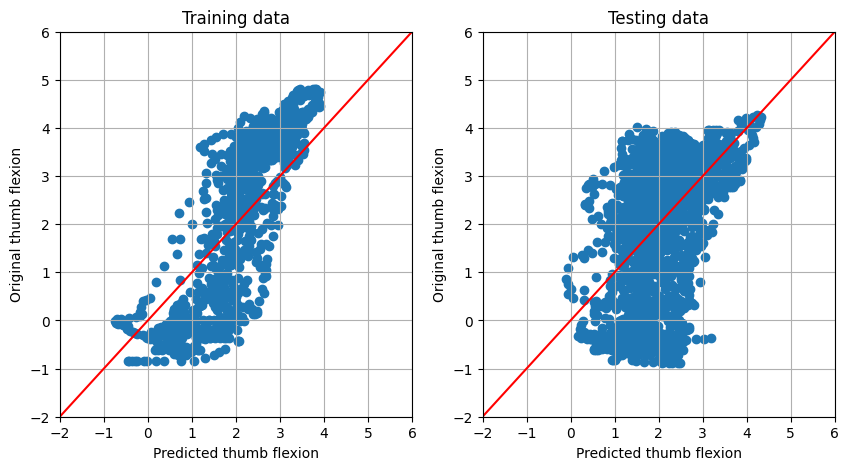

In [253]:
# Scatter plot of the predictions
pl.figure(figsize=(10,5))

pl.subplot(1, 2, 1)
pl.scatter(y_train_pred_best, y_train)
pl.plot(np.arange(-2, 6, 0.001), np.arange(-2, 6, 0.001), c='red')
pl.xlabel('Predicted thumb flexion')
pl.ylabel('Original thumb flexion')
pl.title('Training data')
pl.xlim(-2,6)
pl.ylim(-2,6)
pl.grid()

pl.subplot(1, 2, 2)
pl.scatter(y_test_pred_best, y_test)
pl.plot(np.arange(-2, 6, 0.001), np.arange(-2, 6, 0.001), c='red')
pl.xlabel('Predicted thumb flexion')
pl.ylabel('Original thumb flexion')
pl.title('Testing data')
pl.xlim(-2,6)
pl.ylim(-2,6)
pl.grid()

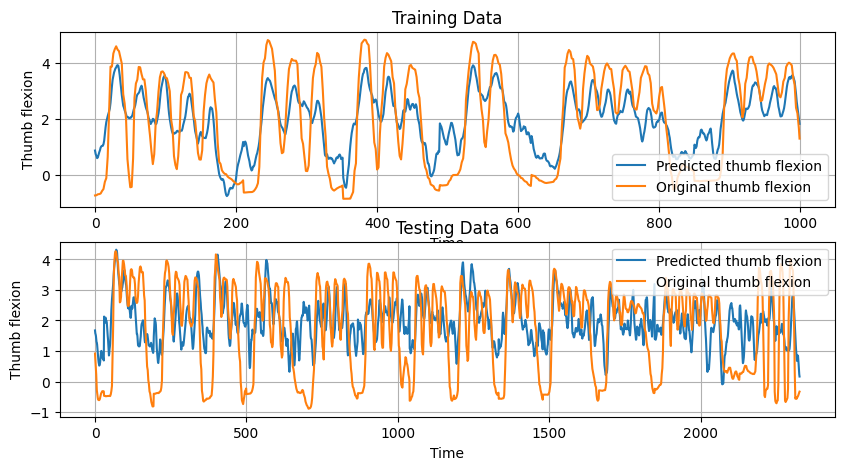

In [254]:
# Plot the original and predicted
pl.figure(figsize=(10,5))

pl.subplot(2, 1, 1)
pl.plot(y_train_pred_best, label='Predicted thumb flexion')
pl.plot(y_train, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Training Data')
pl.grid()
pl.legend()

pl.subplot(2, 1, 2)
pl.plot(y_test_pred_best, label='Predicted thumb flexion')
pl.plot(y_test, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Testing Data')
pl.grid()
pl.legend()

Based on the plots, the values are predicted better than the linear regression model above for both training and testing dataset. We can notice that the predictions sometimes have high peaks, higher than original one.

In [258]:
# MSE on the training and test data
print("MSE on training data: ", mse_train_ridge)
print("MSE on testing data: ", mse_test_ridge)

MSE on training data:  1.1719430382009628
MSE on testing data:  1.623905982695207


In [259]:
# R2 score on the training and test data
print("R2 score on training data: ", r2_train_ridge)
print("R2 score on testing data: ", r2_test_ridge)

R2 score on training data:  0.6268406996047916
R2 score on testing data:  0.2384876612903788


Comparing with LinearRegression, we notice that the LinearRegression model performs better than the Ridge model on the training dataset. But the Ridge model performed better than LinearRegression on the testing data.

The LinearRegression model fits the training data better due to its lack of regularization, but this leads to overfitting. The Ridge model, with regularization, generalizes better to the testing data, thus performing better in terms of predictive accuracy on unseen dat


Text(0.5, 1.0, 'Ridge Regression Model')

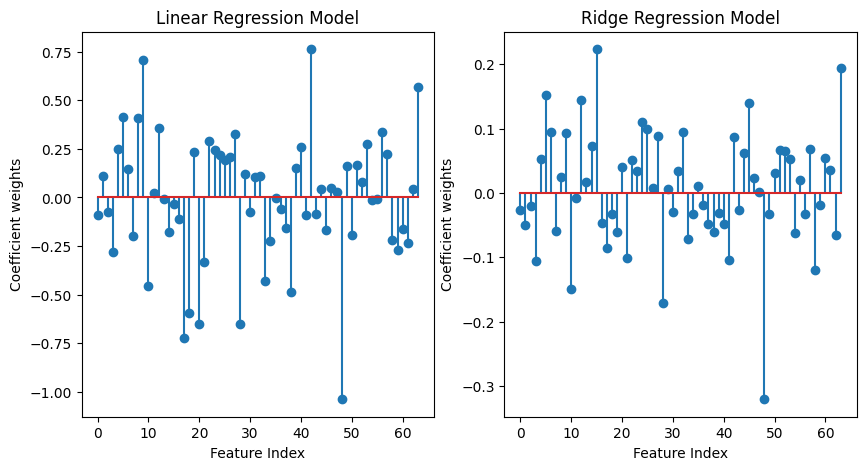

In [261]:
# Plot the coefficients of the linear and ridge regression models
pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.stem(coef.flatten())
pl.xlabel('Feature Index')
pl.ylabel('Coefficient weights')
pl.title('Linear Regression Model')

pl.subplot(1, 2, 2)
pl.stem(ridge_best.coef_.flatten())
pl.xlabel('Feature Index')
pl.ylabel('Coefficient weights')
pl.title('Ridge Regression Model')

Text(0.5, 1.0, 'Ridge Regression Model')

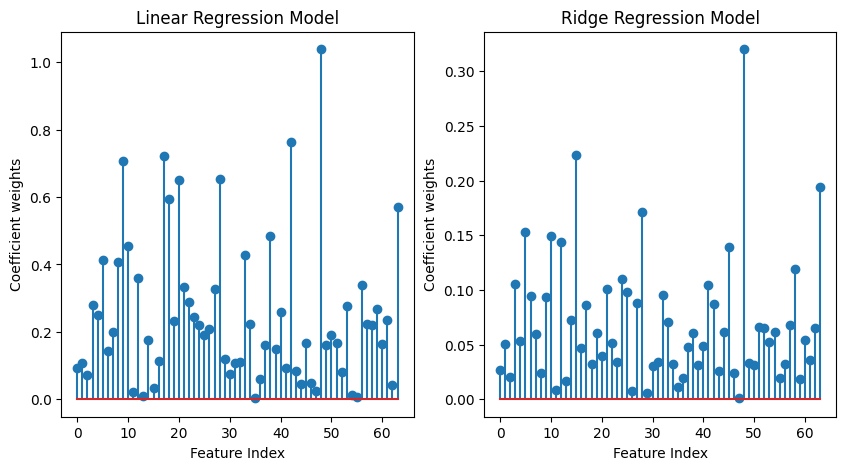

In [262]:
# Plot the absolute value of the coefficients
pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.stem(np.absolute(coef.flatten()))
pl.xlabel('Feature Index')
pl.ylabel('Coefficient weights')
pl.title('Linear Regression Model')

pl.subplot(1, 2, 2)
pl.stem(np.absolute(ridge_best.coef_.flatten()))
pl.xlabel('Feature Index')
pl.ylabel('Coefficient weights')
pl.title('Ridge Regression Model')

Based on these plots, we notice that both have the same distribution and shape, but Ridge regression produces smaller and more evenly distributed coefficients, whereas Linear regression have larger coefficient.

# 5) Variable selection with the Lasso

In [263]:
# Lasso regression
lasso = Lasso()
lasso.fit(x_train, y_train)

y_train_pred_lasso = lasso.predict(x_train)
y_test_pred_lasso = lasso.predict(x_test)

In [264]:
# Calculate the MSE on the training and test data
print("MSE on training data: ", mean_squared_error(y_train, y_train_pred_lasso))
print("MSE on testing data: ", mean_squared_error(y_test, y_test_pred_lasso))

MSE on training data:  3.1405971577280063
MSE on testing data:  2.190675841640482


In [265]:
# Calculate the R2 score on the training and test data
print("R2 score on training data: ", r2_score(y_train, y_train_pred_lasso))
print("R2 score on testing data: ", r2_score(y_test, y_test_pred_lasso))

R2 score on training data:  0.0
R2 score on testing data:  -0.02729265197579034


Based on this result and the previous results, the MSE obtained is the highest so far for both training and testing datasets. While the obtained R2 Score is the lowest for the training, but for testing is better than Linear Regression but lower than the Ridge model.

In [270]:
# Effect of regularization parameter on the coefficients
lambdas = np.logspace(-3, 5, 100)

train_mse = []
test_mse = []
coef_evolution = []

for lambda_ in lambdas:
    lasso = Lasso(alpha=lambda_)
    lasso.fit(x_train, y_train)
    
    y_train_pred = lasso.predict(x_train)
    y_test_pred = lasso.predict(x_test)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
    coef_evolution.append(lasso.coef_)

Text(0.5, 1.0, 'Evolution of Coefficients as a Function of Lambda')

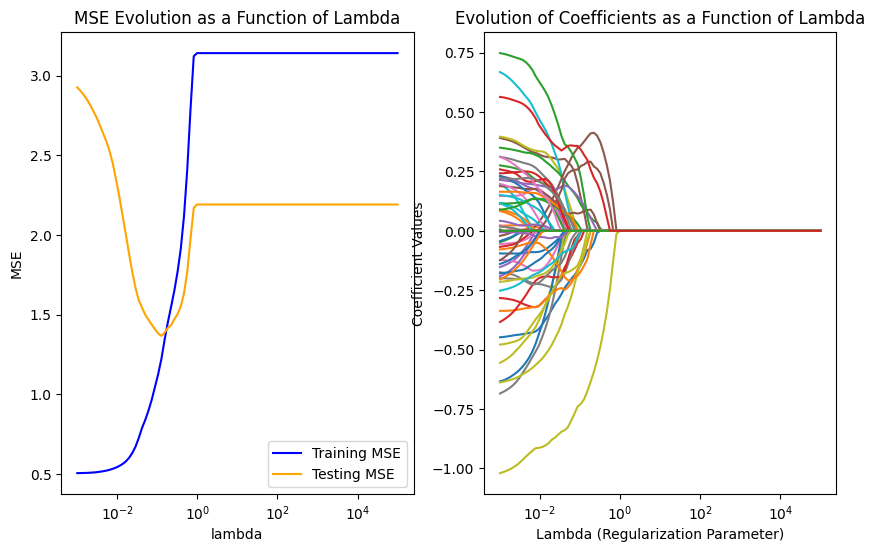

In [271]:
# Plot the MSE and coefficients as a function of lambda
coef_evolution = np.array(coef_evolution)


pl.figure(figsize=(10, 6))

pl.subplot(1, 2, 1)
pl.plot(lambdas, train_mse, label='Training MSE', color='blue')
pl.plot(lambdas, test_mse, label='Testing MSE', color='orange')
pl.xscale('log')
pl.xlabel('lambda')
pl.ylabel('MSE')
pl.title('MSE Evolution as a Function of Lambda')
pl.legend()

pl.subplot(1, 2, 2)
for i in range(coef_evolution.shape[1]):
    pl.plot(lambdas, coef_evolution[:, i], label=f'Coefficient {i+1}')
pl.xscale('log')
pl.xlabel('Lambda (Regularization Parameter)')
pl.ylabel('Coefficient Values')
pl.title('Evolution of Coefficients as a Function of Lambda')

In [273]:
# Select the best lambda based on the test data
best_lambda_index = np.argmin(test_mse)
best_lambda = lambdas[best_lambda_index]

print(f"Best lambda based on test data: {best_lambda}")

Best lambda based on test data: 0.1261856883066021


In [274]:
# Train the model with the best lambda
lasso_best = Lasso(alpha=best_lambda)
lasso_best.fit(x_train, y_train)

y_test_pred_best = lasso_best.predict(x_test)
y_train_pred_best = lasso_best.predict(x_train)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_best)
r2_train_lasso = r2_score(y_train, y_train_pred_best)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_best)
r2_test_lasso = r2_score(y_test, y_test_pred_best)

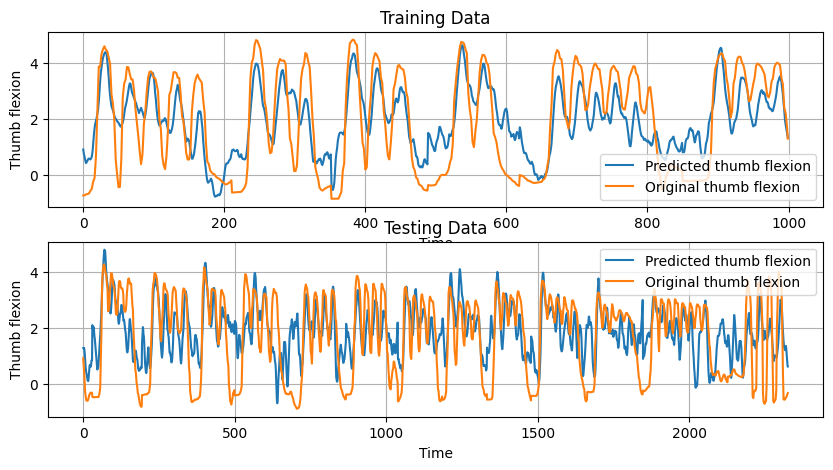

In [275]:
# Plot the predictions and the original data
pl.figure(figsize=(10,5))

pl.subplot(2, 1, 1)
pl.plot(y_train_pred_best, label='Predicted thumb flexion')
pl.plot(y_train, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Training Data')
pl.grid()
pl.legend()

pl.subplot(2, 1, 2)
pl.plot(y_test_pred_best, label='Predicted thumb flexion')
pl.plot(y_test, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Testing Data')
pl.grid()
pl.legend()

In [276]:
# MSE on the training and test data
print("MSE on training data: ", mse_train_lasso)
print("MSE on testing data: ", mse_test_lasso)

MSE on training data:  1.2215631527944377
MSE on testing data:  1.3659542352560023


In [277]:
print("R2 score on training data: ", r2_train_lasso)
print("R2 score on testing data: ", r2_test_lasso)

R2 score on training data:  0.6110411200657935
R2 score on testing data:  0.359451214944292


Text(0.5, 1.0, 'Absolute value of Coefficients')

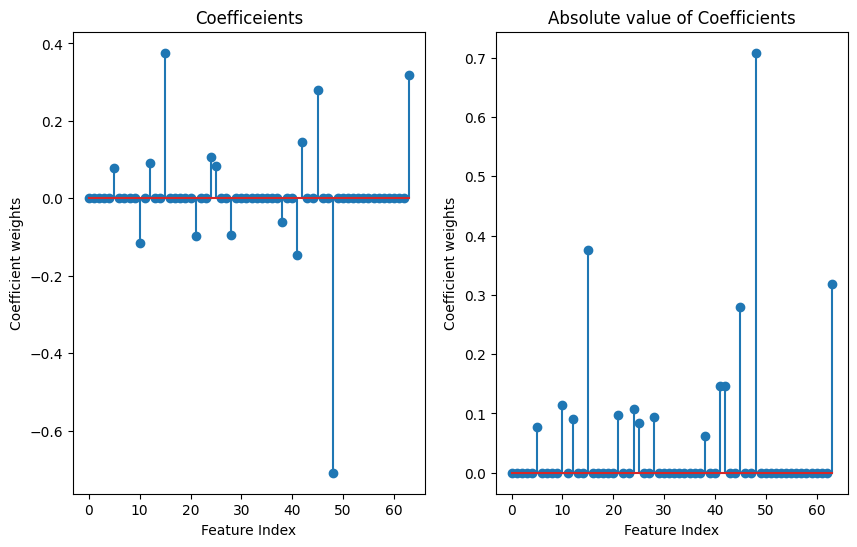

In [278]:
# Plot the coefficients of the lasso regression model
pl.figure(figsize=(10, 6))

pl.subplot(1, 2, 1)
pl.stem(lasso_best.coef_.flatten())
pl.xlabel('Feature Index')
pl.ylabel('Coefficient weights')
pl.title('Coefficeients')

pl.subplot(1, 2, 2)
pl.stem(np.absolute(lasso_best.coef_.flatten()))
pl.xlabel('Feature Index')
pl.ylabel('Coefficient weights')
pl.title('Absolute value of Coefficients')

From this result we can conclude that the Lasso regression model can shrink some coefficients exactly to zero, effectively performing feature selection.

In [280]:
# Important features selected by Lasso
sorted_indices = np.argsort(np.abs(lasso_best.coef_))[::-1]
top_two_indices = sorted_indices[:2]

print(f"The two most important variables are at indices: {top_two_indices}")
print(f"Their coefficients are: {lasso_best.coef_[top_two_indices]}")

# Number of features selected by Lasso
non_zero_count = np.sum(lasso_best.coef_ != 0)
print(f"Number of features selected by Lasso: {non_zero_count}")

The two most important variables are at indices: [48 15]
Their coefficients are: [-0.70862161  0.37611771]
Number of features selected by Lasso: 14


This means that only 14 electrodes out of 64 were selected. This is because these 14 electrodes are the most important and critical ones when it comes to the prediction of the thumb flexion. Other electrodes may have little or no influence on the finger movement prediction.

# 6) Nonlinear Regression

# Rnadom Forest Regressor

In [283]:
# Random Forest Regressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

In [284]:
# Predict the training and test data
y_train_pred_rfr = rfr_model.predict(x_train)
y_test_pred_rfr = rfr_model.predict(x_test)

In [285]:
# Calculate the MSE on the training and test data
print("MSE on training data: ", mean_squared_error(y_train, y_train_pred_rfr))
print("MSE on testing data: ", mean_squared_error(y_test, y_test_pred_rfr))

MSE on training data:  0.022906864251659775
MSE on testing data:  1.6072968467079667


In [286]:
# Calculate the R2 score on the training and test data
print('R2 score on the training data', r2_score(y_train, y_train_pred_rfr))
print('R2 score on the test data', r2_score(y_test, y_test_pred_rfr))

R2 score on the training data 0.992706207418136
R2 score on the test data 0.2462763277060278


The Random Forest model is the best performant model on the train data. However, this isn't necessarily a good thing since it's a sign of overfitting. As for the test data, Random Forest and Ridge have similar performances. 

In [288]:
# Maximize the performance by varying parameters
# Number of estimators
estimators = np.arange(1, 600, 50)
mse_train = []
mse_test = []

for n in estimators:
    random_forest = RandomForestRegressor(n_estimators=int(n))
    random_forest.fit(x_train, y_train)

    y_hat_train = random_forest.predict(x_train)
    y_hat_test = random_forest.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))


mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [293]:
best_n = estimators[np.argmin(mse_test)]

print('The best number of estimators is',best_n)

The best number of estimators is 51


In [294]:
# Train the model with the best number of estimators
random_forest = RandomForestRegressor(n_estimators=int(best_n))
random_forest.fit(x_train, y_train.flatten())

y_hat_train = random_forest.predict(x_train)
y_hat_test = random_forest.predict(x_test)

mse_train_rf = mean_squared_error(y_train, y_hat_train)
r2_train_rf = r2_score(y_test, y_hat_test)
mse_test_rf = mean_squared_error(y_test, y_hat_test)
r2_test_rf = r2_score(y_test, y_hat_test)

In [295]:
print('MSE on the test data', mse_test_rf)
print('R2 score on the test data', r2_test_rf)

MSE on the test data 1.6742977181834777
R2 score on the test data 0.21485702703431175


When setting the number of estimators to its best value in terms of performance maximization no major decrease in the mean squared error were captured, meaning that the performance isn't very dependent on the number of estimators parameter.

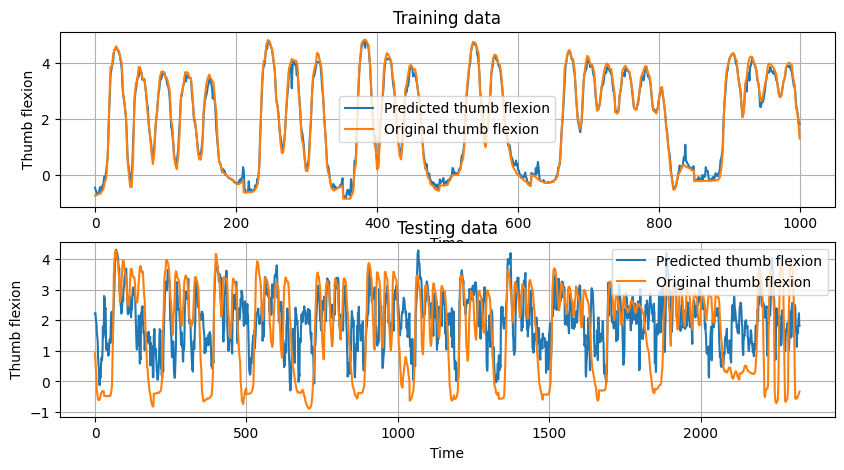

In [296]:
# Plot the predictions and the original data
pl.figure(figsize=(10,5))

pl.subplot(2, 1, 1)
pl.plot(y_hat_train, label='Predicted thumb flexion')
pl.plot(y_train, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Training data')
pl.grid()
pl.legend()

pl.subplot(2, 1, 2)
pl.plot(y_hat_test, label='Predicted thumb flexion')
pl.plot(y_test, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Testing data')
pl.grid()
pl.legend()

On the train data since their plots are nearly exactly the same. This isn't necessarily a good thing since it's a sign of overfitting.

However, this is not the case with the prediction on the test data. Therefore, the prediction isn't that good on the test data. The prediction is still better than that with the Linear Regression model.

# Support Vector Regression

In [297]:
svr_model = SVR()
svr_model.fit(x_train, y_train)

SVR()

In [298]:
y_train_pred_svr = svr_model.predict(x_train)
y_test_pred_svr = svr_model.predict(x_test)

print("MSE on training data: ", mean_squared_error(y_train, y_train_pred_svr))
print("MSE on testing data: ", mean_squared_error(y_test, y_test_pred_svr))

MSE on training data:  0.024085982516610357
MSE on testing data:  1.515182870123942


In [299]:
print('R2 score on the training data', r2_score(y_train, y_hat_train))
print('R2 score on the test data', r2_score(y_test, y_hat_test))

R2 score on the training data 0.9913703983646549
R2 score on the test data 0.21485702703431175


Based on training data, the Support Vectors regressor has the best performance so far. We obtain the lowest and best MSE and the highest R2 score. However, this isn't necessarily a good thing since it's a sign of overfitting.

We can deduce that the SVR and Random Forest models are the best performant models on the train data.

In [305]:
# Maximize the performance by varying parameters
# Tolerance
tols =  np.logspace(-2, -1, 10)
mse_train = []
mse_test = []

for t in tols:
    svr = SVR(tol = t)
    svr.fit(x_train, y_train.flatten())

    y_hat_train = svr.predict(x_train)
    y_hat_test = svr.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))


mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [306]:
best_tol = tols[np.argmin(mse_test)]

print('The best tolerance value for the Support Vectors regression is', best_tol)

The best tolerance value for the Support Vectors regression is 0.0774263682681127


In [307]:
# Regularization parameter
Cs = np.arange(0.1, 1, 0.1)
mse_train = []
mse_test = []

for c in Cs:
    svr = SVR(C = c)
    svr.fit(x_train, y_train.flatten())

    y_hat_train = svr.predict(x_train)
    y_hat_test = svr.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))


mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [308]:
best_c = Cs[np.argmin(mse_test)]
print('The best regularization parameter value for the Support Vectors regression is', best_c)

The best regularization parameter value for the Support Vectors regression is 0.7000000000000001


In [309]:
# Epsilon
epsilons = np.logspace(-4, -3, 10)
mse_train = []
mse_test = []

for e in epsilons:
    svr = SVR(epsilon = e)
    svr.fit(x_train, y_train.flatten())

    y_hat_train = svr.predict(x_train)
    y_hat_test = svr.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))

mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [310]:
best_e = epsilons[np.argmin(mse_test)]
print('The best epsilon value for the Support Vectors regression is', best_e)

The best epsilon value for the Support Vectors regression is 0.00021544346900318845


In [311]:
# Kernel type
kernels= np.array(['linear', 'poly', 'rbf', 'sigmoid'])
mse_train = []
mse_test = []

for k in kernels:
    svr = SVR(kernel = k)
    svr.fit(x_train, y_train.flatten())

    y_hat_train = svr.predict(x_train)
    y_hat_test = svr.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))


mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [312]:
best_k = kernels[np.argmin(mse_test)]
print('The best epsilon value for the Support Vectors regression is', best_k)

The best epsilon value for the Support Vectors regression is rbf


In [313]:
# Train the model with the best parameters
svr = SVR(epsilon = best_e, C=best_c, tol=best_tol, kernel=best_k)
svr.fit(x_train, y_train.flatten())

y_hat_train = svr.predict(x_train)
y_hat_test = svr.predict(x_test)

In [314]:
# Computing the MSE on test data and train data
mse_train_svr = mean_squared_error(y_train, y_hat_train)
mse_test_svr = mean_squared_error(y_test, y_hat_test)

# Computing the R2 score on train data and test data
r2_train_svr = r2_score(y_train, y_hat_train)
r2_test_svr = r2_score(y_test, y_hat_test)

In [315]:
print('MSE on the test data', mse_test_svr)
print('R2 score on the test data', r2_test_svr)

MSE on the test data 1.5049392150608925
R2 score on the test data 0.2942757810555209


When setting the kernel, tolerance, epsilon and the regularization parameters to their best values in terms of performance maximization, we can clearly notice that the mean squared error obtained is slightly less than that obtained with the default parameters.

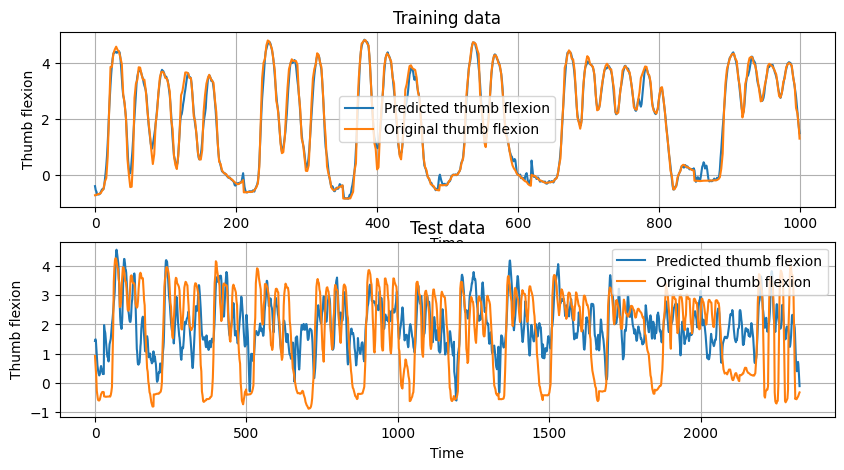

In [316]:
# Plot the predictions and the original data
pl.figure(figsize=(10, 5))

pl.subplot(2, 1, 1)

pl.plot(y_hat_train, label='Predicted thumb flexion')
pl.plot(y_train, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Training data')
pl.grid()
pl.legend()

pl.subplot(2, 1, 2)

pl.plot(y_hat_test, label='Predicted thumb flexion')
pl.plot(y_test, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Test data')
pl.grid()
pl.legend()

Based on the train data since their plots are nearly exactly the same. This isn't necessarily a good thing since it's a sign of overfitting.

The predicted and original thumb flexion on the test data very different from each other. Therefore, the prediction isn't that good on the test data. The prediction is still better than that with the Linear Regression model.

# MLP Regressor

In [317]:
# MLP Regressor
mlp_model = MLPRegressor()
mlp_model.fit(x_train, y_train)

MLPRegressor()

In [318]:
# Predict the training and test data
y_train_pred_mlp = mlp_model.predict(x_train)
y_test_pred_mlp = mlp_model.predict(x_test)

print("MSE on training data: ", mean_squared_error(y_train, y_train_pred_mlp))
print("MSE on testing data: ", mean_squared_error(y_test, y_test_pred_mlp))

MSE on training data:  0.009836954615789132
MSE on testing data:  2.346115295712242


In [319]:
print('R2 score on the training data', r2_score(y_train, y_train_pred_mlp))
print('R2 score on the test data', r2_score(y_test, y_test_pred_mlp))

R2 score on the training data 0.9968678075787009
R2 score on the test data -0.10018422541619043


In [320]:
# Maximize the performance by varying parameters
# Number of hidden layers 
sizes = np.arange(100, 200, 10)
mse_train = []
mse_test = []


for a in sizes:
    mlp = MLPRegressor(hidden_layer_sizes = a).fit(x_train, y_train)

    y_hat_train = mlp.predict(x_train)
    y_hat_test = mlp.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))


mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [321]:
best_s = sizes[np.argmin(mse_test)]
print('The best hidden layer size for the MLP regression is', best_s)

The best hidden layer size for the MLP regression is 150


In [322]:
# Strength of the L2 regularization term
alphas = np.logspace(-4, -3, 10)
mse_train = []
mse_test = []

for a in alphas:
    mlp = MLPRegressor(alpha = a).fit(x_train, y_train.flatten())

    y_hat_train = mlp.predict(x_train)
    y_hat_test = mlp.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))


mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [323]:
best_a= alphas[np.argmin(mse_test)]
print('The best regularization parameter value for the MLP regression is', best_a)

The best regularization parameter value for the MLP regression is 0.0001291549665014884


In [324]:
# Train the model with the best parameters
mlp = MLPRegressor(solver='sgd', learning_rate='adaptive', alpha = best_a, hidden_layer_sizes = best_s).fit(x_train, y_train)

y_hat_train = mlp.predict(x_train)
y_hat_test = mlp.predict(x_test)

# Computing the MSE on test data and train data
mse_train_mlp = mean_squared_error(y_train, y_hat_train)
mse_test_mlp = mean_squared_error(y_test, y_hat_test)
# Computing the R2 score on train data and test data
r2_train_mlp = r2_score(y_test, y_hat_test)
r2_test_mlp = r2_score(y_test, y_hat_test)

In [325]:
print('MSE on the test data', mse_test_mlp)
print('R2 score on the test data', r2_test_mlp)

MSE on the test data 1.9027656470422096
R2 score on the test data 0.10771957654188924


After adjusting the parameters we can say that the MSE score on test data is decreased and the R2 score is increased, then the performance is imporved of the model.

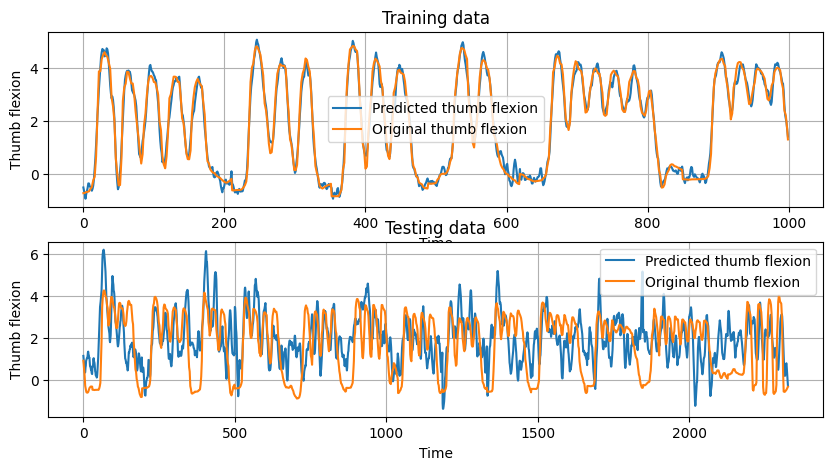

In [326]:
# Plot the predictions and the original data
pl.figure(figsize=(10, 5))

pl.subplot(2, 1, 1)

pl.plot(y_hat_train, label='Predicted thumb flexion')
pl.plot(y_train, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Training data')
pl.grid()
pl.legend()

pl.subplot(2, 1, 2)

pl.plot(y_hat_test, label='Predicted thumb flexion')
pl.plot(y_test, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Testing data')
pl.grid()
pl.legend()

The prediction very good on the train data since their plots are nearly exactly the same. This isn't necessarily a good thing since it's a sign of overfitting.

However, this is not the case with the prediction on the test data. Therefore, the prediction isn't that good on the test data. The prediction is still better than that with the Linear Regression model.

# Gradient Boosting Regressor

In [327]:
# GBM Regressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [328]:
# Predict the training and test data
y_train_pred_gbr = gbr_model.predict(x_train)
y_test_pred_gbr = gbr_model.predict(x_test)

In [329]:
print("MSE on training data: ", mean_squared_error(y_train, y_train_pred_gbr))
print("MSE on testing data: ", mean_squared_error(y_test, y_test_pred_gbr))

MSE on training data:  0.11333713838888568
MSE on testing data:  1.7005404379733862


In [330]:
print("R2 Score on training data: ", r2_score(y_train, y_train_pred_gbr))
print("R2 Score on testing data: ", r2_score(y_test, y_test_pred_gbr))

R2 Score on training data:  0.9639122330254936
R2 Score on testing data:  0.20255080048285423


In [331]:
# Maximize the performance by varying parameters
# Varying the learning rate
lrs = np.arange(0.1, 2, 0.1)
mse_train = []
mse_test = []

for r in lrs:
    gradient_boosting = GradientBoostingRegressor(learning_rate = r).fit(x_train, y_train)

    y_hat_train = gradient_boosting.predict(x_train)
    y_hat_test = gradient_boosting.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))


mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [332]:
best_r= lrs[np.argmin(mse_test)]
print('The best learning rate value for the MLP regression is', best_r)

The best learning rate value for the MLP regression is 0.1


In [333]:
# Varying the number of estimators
estimators = np.arange(100, 200, 5)
mse_train = []
mse_test = []

for n in estimators:
    gradient_boosting = GradientBoostingRegressor(n_estimators = int(n)).fit(x_train, y_train)

    y_hat_train = gradient_boosting.predict(x_train)
    y_hat_test = gradient_boosting.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))


mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [334]:
best_n = estimators[np.argmin(mse_test)]
print('The best number of estimators for the Gradient Boosting regressor is', best_n)

The best number of estimators for the Gradient Boosting regressor is 190


In [335]:
# Varying the loss function
losses = ['squared_error', 'absolute_error', 'huber', 'quantile']
mse_train = []
mse_test = []

for l in losses:
    gradient_boosting = GradientBoostingRegressor(loss = l).fit(x_train, y_train)

    y_hat_train = gradient_boosting.predict(x_train)
    y_hat_test = gradient_boosting.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_hat_train))
    mse_test.append(mean_squared_error(y_test, y_hat_test))

mse_train = np.array(mse_train)
mse_test = np.array(mse_test)

In [336]:
best_l = losses[np.argmin(mse_test)]
print('The best activation function is', best_l)

The best activation function is squared_error


In [337]:
# Train the model with the best parameters
gradient_boosting = GradientBoostingRegressor(learning_rate = best_r, n_estimators = int(best_n), loss=best_l).fit(x_train, y_train.flatten())

# Predict the training and test data
y_hat_train = gradient_boosting.predict(x_train)
y_hat_test = gradient_boosting.predict(x_test)

In [338]:
# Computing the MSE on test data and train data
mse_train_gb = mean_squared_error(y_train, y_hat_train)
mse_test_gb = mean_squared_error(y_test, y_hat_test)
# Computing the R2 score on train data and test data
r2_train_gb = r2_score(y_train, y_hat_train)
r2_test_gb = r2_score(y_test, y_hat_test)

In [339]:
print('MSE on the test data', mse_test_gb)
print('R2 score on the test data', r2_test_gb)

MSE on the test data 1.6869984326303489
R2 score on the test data 0.20890117068253722


When setting the parameters to their best values in terms of performance maximization, we can clearly notice that the mean squared error obtained is nearly equal to that obtained with the default parameters. No major decrease in the mean squared error were captured.

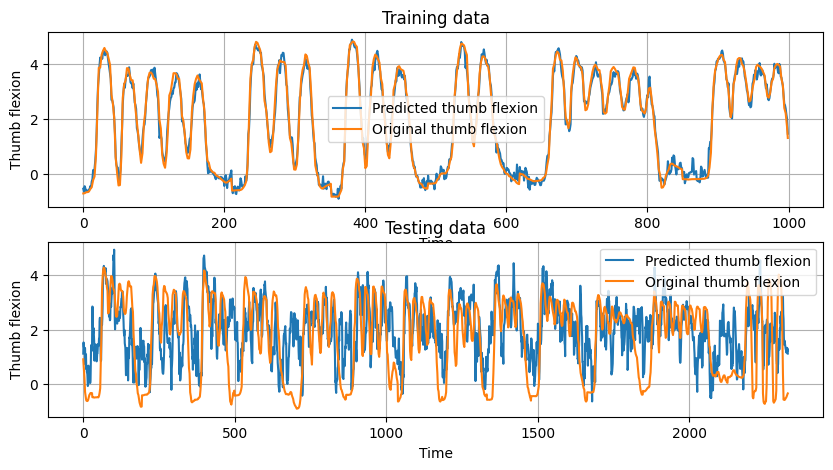

In [340]:
# Plot the predictions and the original data
pl.figure(figsize=(10, 5))

pl.subplot(2, 1, 1)

pl.plot(y_hat_train, label='Predicted thumb flexion')
pl.plot(y_train, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Training data')
pl.grid()
pl.legend()

pl.subplot(2, 1, 2)

pl.plot(y_hat_test, label='Predicted thumb flexion')
pl.plot(y_test, label='Original thumb flexion')
pl.xlabel('Time')
pl.ylabel('Thumb flexion')
pl.title('Testing data')
pl.grid()
pl.legend()

The prediction very good on the train data since their plots are nearly exactly the same. This isn't necessarily a good thing since it's a sign of overfitting.

However, this is not the case with the prediction on the test data. Therefore, the prediction isn't that good on the test data. The prediction is still better than that with the Linear Regression model.

# 7) Final Comparison of the Performances

In [345]:
# Summary of the results
mse_test = [mse_test_lse, mse_test_ridge, mse_test_lasso, mse_test_rf, mse_test_svr, mse_test_mlp, mse_test_gb]
mse_train = [mse_train_lse, mse_train_ridge, mse_train_lasso, mse_train_rf, mse_train_svr, mse_train_mlp, mse_train_gb]
r2_test = [r2_test_ls,r2_test_ridge, r2_test_lasso, r2_test_rf, r2_test_svr,r2_test_mlp, r2_test_gb]
r2_train = [r2_train_ls, r2_train_ridge, r2_train_lasso, r2_train_rf, r2_train_svr, r2_train_mlp, r2_train_gb]

In [346]:
# Model names
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
               'Random Forest', 'Support Vector Regression', 
               'Multi-layer Perceptron', 'Gradient Boosting']

# Creating the DataFrame
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MSE Train': mse_train,
    'MSE Test': mse_test,
    'R2 Train': r2_train,
    'R2 Test': r2_test
})

In [347]:
metrics_df

,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,Linear Regression,0.504065,3.045537,0.839500,-0.428170
1,Ridge Regression,1.171943,1.623906,0.626841,0.238488
2,Lasso Regression,1.221563,1.365954,0.611041,0.359451
3,Random Forest,0.027102,1.674298,0.214857,0.214857
4,Support Vector Regression,0.040869,1.504939,0.986987,0.294276
5,Multi-layer Perceptron,0.049184,1.902766,0.107720,0.107720
6,Gradient Boosting,0.041383,1.686998,0.986823,0.208901


**Which methods work the best in practice?**

Linear Regression: Shows low MSE for training data but high MSE on test data, with a negative R² test score, indicating poor generalization and possible overfitting.

Ridge and Lasso Regression: Both have better R² scores than Linear Regression for the test set, with Lasso slightly outperforming Ridge in terms of R². These models are effective when trying to regularize and avoid overfitting.

Random Forest and Gradient Boosting: Despite good training performance (low MSE), the test scores are not as high, indicating possible overfitting. Random Forest has a moderate R², while Gradient Boosting performs similarly.

Support Vector Regression (SVR): Performs decently, with a relatively low test MSE and high R² on the training set, indicating good fit but some potential for overfitting.

Multi-layer Perceptron (MLP): Shows the highest MSE on the test set, implying it did not generalize well.

The best-performing models in terms of test R² are Lasso Regression and Support Vector Regression. They balance training performance and generalization on unseen data

**What are the most interpretable models?**

Linear Regression, Ridge, and Lasso Regression are the most interpretable. Their coefficients can directly show the impact of each feature, making it easier to understand how each predictor influences the outcome.

Tree-based models (Random Forest, Gradient Boosting) provide feature importance scores, which help understand feature relevance but are less interpretable than linear models.

SVR and MLP are considered less interpretable due to their complex internal structures.

**Which model is best from a medical/practical perspective?**

Lasso Regression could be a good choice since it not only performs well but also offers model simplicity by shrinking coefficients of less important features to zero.

Support Vector Regression may also be a viable option if predictive accuracy is more important than interpretability, given its relatively good test performance.

Linear models (Linear Regression, Ridge, Lasso) are usually preferred in the medical field for their interpretability and ease of understanding.

**Do we need non-linearity in this application?**

Non-linear models like Random Forest, Gradient Boosting, SVR, and MLP seem to struggle with overfitting, indicating that the dataset may not have strong non-linear relationships or that the non-linear models need more tuning (e.g., hyperparameters). If interpretability is crucial and the dataset doesn't demonstrate significant non-linearity, linear models with regularization (Lasso, Ridge) are better suited.

**Is validation on the test data a good practice?**

Using test data for model evaluation is standard practice, but it should not be used to tune hyperparameters, as this can lead to overfitting on the test set. Instead:

Use cross-validation (e.g., k-fold) on the training data for hyperparameter tuning.

Keep the test set solely for the final evaluation of the model's performance.

**What would you do if you need to provide a model to a client for prediction in production?**

Select the best-performing model (considering R², MSE, and interpretability).

Retrain the model on the entire training dataset, including any hyperparameter optimization.

Implement regularization (like Lasso or Ridge) to improve generalization and avoid overfitting.

Deploy the model in a framework that allows monitoring and updating based on new data.

Periodically retrain the model with new data to maintain accuracy in a production environment.

# Personal Discussion

Implementing some of the regression models, especially the non-linear ones like Support Vector Regression (SVR) and Multi-layer Perceptron (MLP), was challenging.It was difficult to achieve a balance between underfitting and overfitting, especially for non-linear models.

I also learned the importance of cross-validation techniques in obtaining reliable estimates of model performance and will incorporate them more rigorously next time to prevent overfitting.

This lab provided a deeper understanding of tree-based methods and ensemble learning. While I was familiar with the basics, seeing how they performed on different datasets clarified their strengths and limitations

Overall, this session has equipped me with practical skills in applying different regression techniques and evaluating their performance, which are essential for real-world data science and machine learning projects.